In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 =pd.read_csv("cereal.csv")
df1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# sklearn

In [3]:
from sklearn import linear_model

LogisticRegression 也是这个包里面的  linear_model.LogisticRegression

In [24]:
# x要reshape的  要用 df.values.reshape把横的变成竖的
x1 = df1.sugars.values.reshape(-1,1)
y1 = df1.calories

In [25]:
model1 = linear_model.LinearRegression().fit(x1,y1)

In [26]:
model1.coef_

array([2.4650141])

In [7]:
# r^2
model1.score(x1,y1)

0.31622660153627125

In [8]:
model1.intercept_

89.82009721669637

In [31]:
y_pred = model1.predict(x1)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

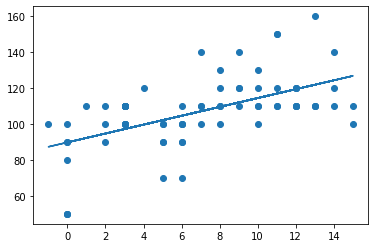

In [11]:
plt.scatter(x1,y1)
plt.plot(x1,y_pred)

D:\APP\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


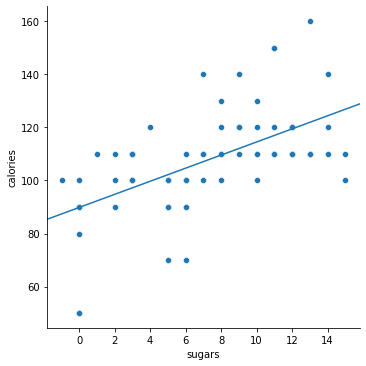

In [30]:
#用seaborn画

a1 =sns.relplot(df1.sugars,df1.calories)
##加一条线
a1.ax.axline( xy1 = (df1.sugars.min(),  model1.predict( np.array( [ [df1.sugars.min()]] ) )[0] ) ,slope = model1.coef_ )


D:\APP\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


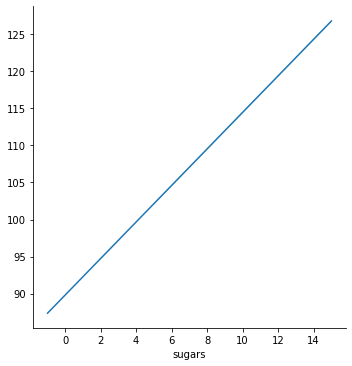

In [32]:
# 直接画一条线 replot
sns.relplot(df1.sugars, y_pred, kind= "line")

In [52]:
from sklearn import linear_model
x1 = df1.sugars.values.reshape(-1,1)
y1 = df1.calories

In [53]:
model1 =linear_model.LinearRegression().fit(x1,y1)
model1.intercept_, model1.coef_

(89.82009721669637, array([2.4650141]))

model1.predict(x1)

# statsmodels

In [33]:
import statsmodels.api as sm

In [34]:
# 这个包不需要 value.reshape()
x2 = df1.sugars
y2 = df1.calories

In [35]:
# add constant
x2 = sm.add_constant(x2)
x2

,const,sugars
0,1.0,6
1,1.0,8
2,1.0,5
3,1.0,0
4,1.0,8
...,...,...
72,1.0,3
73,1.0,12
74,1.0,3
75,1.0,3


In [36]:
model = sm.OLS(y2,x2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     34.69
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.02e-07
Time:                        21:07:25   Log-Likelihood:                -322.78
No. Observations:                  77   AIC:                             649.6
Df Residuals:                      75   BIC:                             654.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.8201      3.437     26.137      0.000      82.974      96.666
sugars         2.4650      0.419      5.889      0.000       1.631       3.299
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.837
Skew:                          -0.235   Prob(JB):                        0.399
Kurtosis:                       3.594   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.predict(x2)

0     104.610182
1     109.540210
2     102.145168
3      89.820097
4     109.540210
         ...    
72     97.215140
73    119.400266
74     97.215140
75     97.215140
76    109.540210
Length: 77, dtype: float64

In [38]:
##给intercept加一个位置
# constant 放前面
np.array( [[1,3] , [1,2] ])

array([[1, 3],
       [1, 2]])

In [42]:

result2.predict( np.array( [[1,3] , [1,2] ]))

array([97.21513951, 94.75012541])

In [45]:
np.array( [1,3,1,2] ).reshape(2,-1)

array([[1, 3],
       [1, 2]])